In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dataset.shape

(768, 9)

In [10]:
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age', 'Glucose', 'BloodPressure', 'DiabetesPedigreeFunction']
x = dataset[feature_cols]
y = dataset.Outcome

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [12]:
logreg = LogisticRegression(max_iter = len(x_train))
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)

In [13]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

**Matriz de confusión**

Representación gráfica que nos permite ver el grado de acierto de nuestro modelo. El gráfico tiene cuatro divisiones: Verdaderos Positivos (VP), Falsos Positivos (FP), Falsos Negativos (FN) y Verdaderos Negativos (VN). Siendo los datos verdaderos los que nos interesa maximizar (valores de la diagonal).

Graficado de la Matriz de Confusion:

Los datos necesarios los obtenemos de nuestro modelo (con ayuda del módulo metrics):

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]])

Text(0.5, 257.44, 'Etiqueta de predicción')

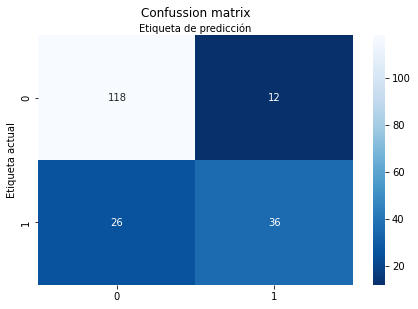

In [15]:
import numpy as np
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title("Confussion matrix", y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('Etiqueta de predicción')


Primer cuadro: 118 datos se clasificaron de forma correcta cuando son positivos
La matrix se lee en diagonal, en la esquina inferior derecha: se clasificaron correctamente cuando los valores son negativos

Cuadro superior derecho, clasificados erroneamente como negativos

Cuadro inferior izq, clasificados erroneamente como positivos

In [16]:
print('Exactitud', metrics.accuracy_score(y_test, y_pred))

Exactitud 0.8020833333333334
